In [6]:
import os
from pathlib import Path
import json
import pandas as pd

In [7]:
conda_meta_path = Path(os.environ["CONDA_PREFIX"]) / "conda-meta"

In [8]:
names = []
licenses = []
for file in conda_meta_path.glob("*.json"):
    with open(file, "r") as f:
        json_dict = json.load(f)
        names.append(json_dict["name"])
        licenses.append(json_dict.get("license"))

all_licenses = pd.DataFrame(index=licenses, data={"name": names})
all_licenses

,name
BSD-3-Clause,affine
BSD 3-Clause,alabaster
BSD-2-Clause,aom
MIT,appdirs
MIT,asciitree
...,...
LGPL-3.0-or-later,zeromq
BSD-3-Clause,zict
MIT,zipp
Zlib,zlib


<AxesSubplot:>

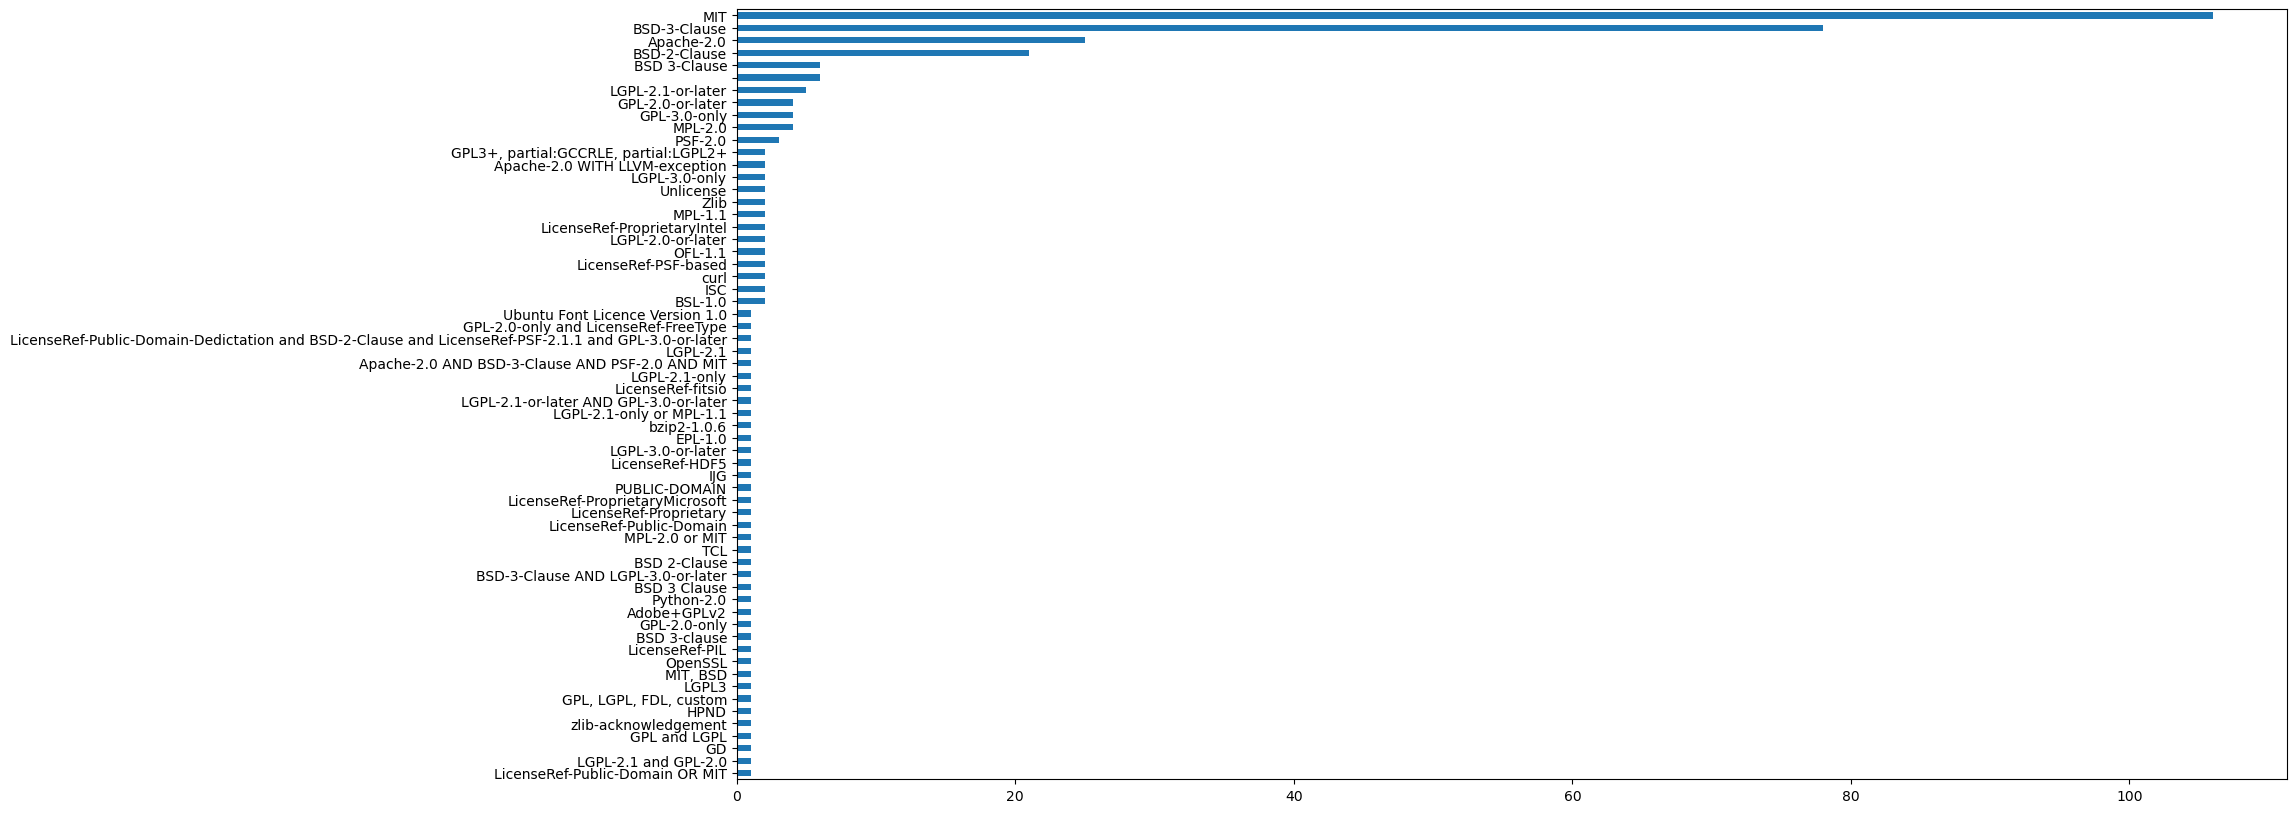

In [9]:
all_licenses.index.value_counts(ascending=True).plot(kind="barh", figsize=(20, 10))

In [10]:
acceptable_licence_strings = [
    "MIT",
    "BSD",
    "Apache",
    "GPL",
    "MPL",
    "Unlicense",
    "PUBLIC-DOMAIN",
    "Public Domain",
    "ISC",
    "PSF",
    "Zlib",
    "OFL",
    "BSL",
    "Font Licence",
    "bzip",
    "EPL",
    "IJG",
    "TCL",
    "Python-2.0",
    "OpenSSL",
    "HPND",
    "GD",
    "zlib",
    "curl",
    "LicenseRef-fitsio",
    "LicenseRef-HDF5",
    "LicenseRef-PIL",
    "LicenseRef-Public-Domain"
]
licenses_investigate = all_licenses
for acceptable in acceptable_licence_strings:
    licenses_investigate = licenses_investigate.drop(licenses_investigate.filter(regex=acceptable, axis=0).index)
licenses_investigate


,name
,gst-plugins-base
,gstreamer
LicenseRef-ProprietaryIntel,intel-openmp
,libgdal
,libpq
LicenseRef-ProprietaryIntel,mkl
,msys2-conda-epoch
LicenseRef-PIL,pillow
,postgresql
LicenseRef-Public-Domain,tzdata
